In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
#from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

In [2]:
import tensorflow as tf
import multiprocessing as mp
from keras.datasets import cifar10

In [4]:
batch_size = 32 
num_classes = 10
epochs = 100

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

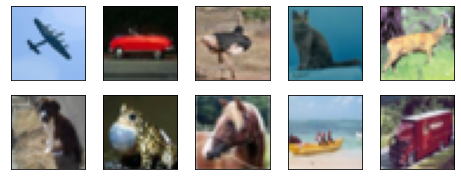

In [7]:
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    #ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [8]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [10]:
def base_model():

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9 ,nesterov=True)

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
cnn_n = base_model()
cnn_n.summary()

cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test,y_test),shuffle=True)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
keep_dims is deprecated, use keepdims instead

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 30, 30)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 30, 30)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 15, 15)        0         
_______

50000/50000 [==============================] - 168s - loss: 2.3087 - acc: 0.0989 - val_loss: 2.3101 - val_acc: 0.1000
Epoch 17/100
50000/50000 [==============================] - 167s - loss: 2.3092 - acc: 0.1004 - val_loss: 2.3106 - val_acc: 0.1000
Epoch 18/100
50000/50000 [==============================] - 171s - loss: 2.3091 - acc: 0.1018 - val_loss: 2.3105 - val_acc: 0.1000
Epoch 19/100
50000/50000 [==============================] - 169s - loss: 2.3091 - acc: 0.1014 - val_loss: 2.3121 - val_acc: 0.1000
Epoch 20/100
50000/50000 [==============================] - 176s - loss: 2.3092 - acc: 0.1008 - val_loss: 2.3085 - val_acc: 0.1000
Epoch 21/100
50000/50000 [==============================] - 179s - loss: 2.3091 - acc: 0.0991 - val_loss: 2.3047 - val_acc: 0.1000
Epoch 22/100
50000/50000 [==============================] - 180s - loss: 2.3095 - acc: 0.0973 - val_loss: 2.3067 - val_acc: 0.1000
Epoch 23/100
50000/50000 [==============================] - 180s - loss: 2.3094 - acc: 0.0992 - 

50000/50000 [==============================] - 179s - loss: 2.3090 - acc: 0.0981 - val_loss: 2.3075 - val_acc: 0.1000
Epoch 79/100
50000/50000 [==============================] - 179s - loss: 2.3084 - acc: 0.0980 - val_loss: 2.3065 - val_acc: 0.1000
Epoch 80/100
50000/50000 [==============================] - 180s - loss: 2.3086 - acc: 0.1001 - val_loss: 2.3107 - val_acc: 0.1000
Epoch 81/100
50000/50000 [==============================] - 180s - loss: 2.3087 - acc: 0.0980 - val_loss: 2.3071 - val_acc: 0.1000
Epoch 82/100
50000/50000 [==============================] - 181s - loss: 2.3082 - acc: 0.1010 - val_loss: 2.3085 - val_acc: 0.1000
Epoch 83/100
50000/50000 [==============================] - 181s - loss: 2.3091 - acc: 0.1003 - val_loss: 2.3066 - val_acc: 0.1000
Epoch 84/100
50000/50000 [==============================] - 180s - loss: 2.3084 - acc: 0.0987 - val_loss: 2.3105 - val_acc: 0.1000
Epoch 85/100
50000/50000 [==============================] - 179s - loss: 2.3082 - acc: 0.0976 - 